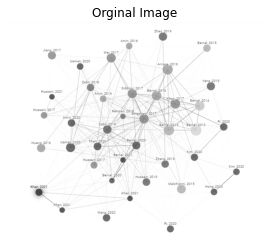

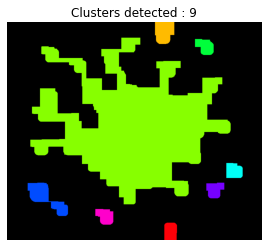

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Reading the input image
img = cv2.imread('graph.png', 0)
 
size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(img,-1,gauss_kernel)

size2=3
fil_kernel = np.ones((size2,size2), np.uint8)
img_dilation = cv2.dilate(imager, fil_kernel, iterations=2)
img_erosion = cv2.erode(img_dilation, fil_kernel, iterations=30)


# convert to grayscale
image = img_erosion
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]<=245:
            image[i,j]=0
        else:
            image[i,j]=255

            
img_dilation2 = cv2.dilate(image, fil_kernel, iterations=20)


#------------------------------------------------Filling cavities-------------------
# Read image
im_in = img_dilation2

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
#------------------------------------------------------------------------------------------

# cv2.imshow('Input', img)
# cv2.imshow('Erosion', img_dilation2)
 
# cv2.waitKey(0)
#------------------------------------------------------------
def connected_component_label(img,org_image):
    
   
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    fig1 = plt.gcf()
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Clusters detected : "+str(num_labels))
    plt.show()
    fig1.savefig('graph_clusters_detected.jpg',dpi=1000, bbox_inches='tight')

connected_component_label(im_out,img)

